In [53]:
import sys
sys.path.append("..")


## from ustklasor.dosya import module ## UST KLASORU EKLEME

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time


import gc
import sys
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Merve Yuce KIZRAK Predictive Maintenance of Aircraft Motor Health with Long-Short Term Memory Method

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed for reproducability 
# Çoğaltılabilirlik için seed ayarlama
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, Activation

%matplotlib inline

import keras
import keras.backend as K
from keras.layers.core import Activation
from tensorflow import keras


In [55]:
sequence_length = 8

In [56]:
# Bu pasif excel yerine serverdan alınıyor
# data = pd.read_csv("data/14_PGM_6_OP_30_EZME_3_CA_B8_31_00_00_72_.csv")
# data.head()

In [57]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from Mongo.A2_Olcum import OlcumAl,TekOlcumAl
import datetime
from os import chdir, mkdir, open,listdir, getcwd, path, rmdir,makedirs

device = 'CA:B8:31:00:00:21'

baslangic_tarih = str(datetime.datetime.combine(datetime.datetime.strptime("2023-06-01", '%Y-%m-%d'), datetime.time(00, 00, 00)))
bitis_tarih = str(datetime.datetime.combine(datetime.datetime.strptime("2023-10-03", '%Y-%m-%d'), datetime.time(23, 59, 59)))  

from_date = datetime.datetime.strptime(baslangic_tarih, '%Y-%m-%d %H:%M:%S')
to_date = datetime.datetime.strptime(bitis_tarih, '%Y-%m-%d %H:%M:%S')

# gateway var asagıda yok 
# veri,veriAdet=OlcumAl(gelen_collection="measurements",gelen_query=dict({"gateway": gateway, "device": device,"createdAt": {"$gte": from_date, "$lte": to_date}}))

df,dataList,dataAdet=OlcumAl(limitCount = 5000,gelen_collection="measurements",gelen_query=dict({"device": device,"createdAt": {"$gte": from_date, "$lte": to_date}}))


print("veri adet = ",dataAdet)

print("veri adet-2 = ",len(dataList))

data = df.copy()

Tek data dondu
query calisti
 bulunan adet =  1076
Datalar Bulundu
OK sayisi 1063
getjson except sayisi 13
Machine ID = 9
Machine Name =PGM_2_OP_30_HAZIRLAMA
Recipe Number = 3
veri adet =  1063
veri adet-2 =  1063


In [58]:
datatoexcel = pd.ExcelWriter('datasetAllData.xlsx')
df.to_excel(datatoexcel)
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [59]:
data.index = pd.to_datetime(data["createdAt"].squeeze(), format = "%Y-%m-%dT%H:%M:%S.%fZ")

In [60]:
data.head()

,Id,createdAt,MEASUREMENT_START_TIME,MEASUREMENT_START_UNIXTIME,CHUNK_COUNT,CALIBRATED_SAMPLINGRATE,device,gateway,TEMPERATURE,CLEARANCE_1,...,PEAK_TO_PEAK_2,PEAK_TO_PEAK_3,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data
"(createdAt,)",,,,,,,,,,,,,,,,,,,,,
2023-06-08 17:37:08.269,648211c4ca5a4302b614aafa,2023-06-08T17:37:08.269000Z,09:34:22:04:01:1970,293659,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,33.08,7.05529,...,0.122803,0.181824,3.02,3.13,0.0,0.0,1.0,4108.42,102.0,NaN
2023-06-08 18:07:39.135,648218ebca5a4302b614ab07,2023-06-08T18:07:39.135000Z,10:04:53:04:01:1970,295490,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,35.01,6.796348,...,0.067017,0.064026,3.01,3.11,0.0,0.0,1.0,1830.88,102.0,NaN
2023-06-08 18:44:52.934,648221a4ca5a4302b614ab14,2023-06-08T18:44:52.934000Z,10:42:06:04:01:1970,297724,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,34.1,6.29363,...,0.067993,0.08606,3.17,3.31,0.0,0.0,1.0,2233.63,102.0,NaN
2023-06-08 19:23:21.574,64822aa9ca5a4302b614ab21,2023-06-08T19:23:21.574000Z,11:20:38:04:01:1970,300035,1,822,CA:B8:31:00:00:21,CA:B8:28:00:00:82,33.49,54.723382,...,0.16748,0.122253,3.16,3.28,0.0,0.0,1.0,2308.6,102.0,NaN
2023-06-08 19:54:24.846,648231f0ca5a4302b614ab2e,2023-06-08T19:54:24.846000Z,11:51:38:04:01:1970,301896,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,35.37,8.549123,...,0.082275,0.078735,3.22,3.4,0.0,0.0,1.0,1863.52,102.0,NaN


In [61]:
data.tail()

,Id,createdAt,MEASUREMENT_START_TIME,MEASUREMENT_START_UNIXTIME,CHUNK_COUNT,CALIBRATED_SAMPLINGRATE,device,gateway,TEMPERATURE,CLEARANCE_1,...,PEAK_TO_PEAK_2,PEAK_TO_PEAK_3,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data
"(createdAt,)",,,,,,,,,,,,,,,,,,,,,
2023-10-03 21:33:05.800,651c88915c26cf00220ae5a4,2023-10-03T21:33:05.800000Z,15:52:01:02:01:1970,143518,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,36.81,8.428254,...,0.880066,0.187256,2.85,2.85,0.0,0.0,2.02,1.0,1815.95,102.0
2023-10-03 22:06:03.261,651c904b5c26cf00220ae5ac,2023-10-03T22:06:03.261000Z,16:24:58:02:01:1970,145496,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,40.75,8.474158,...,0.886414,0.340332,2.86,2.87,0.0,0.0,8.54,1.0,1977.59,102.0
2023-10-03 22:36:10.090,651c975a5c26cf00220ae5b2,2023-10-03T22:36:10.090000Z,16:55:05:02:01:1970,147302,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,40.22,6.617327,...,0.990906,0.177368,2.86,2.86,0.0,0.0,6.63,1.0,1806.85,102.0
2023-10-03 23:16:49.135,651ca0e15c26cf00220ae5ba,2023-10-03T23:16:49.135000Z,17:35:44:02:01:1970,149741,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,37.36,7.326737,...,1.035828,0.333374,2.89,2.89,0.0,0.0,1.14,1.0,2439.04,102.0
2023-10-03 23:47:19.043,651ca8075c26cf00220ae5c0,2023-10-03T23:47:19.043000Z,18:06:20:02:01:1970,151578,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,38.83,28.376968,...,0.226013,0.084595,2.87,2.86,0.0,0.0,1.27,1.0,1829.83,102.0


# Burdan

In [1149]:
#**********************
# belli araligi alma
# w0 = '2023-02-01T00:00:00.359'
# w1 = '2023-02-08T23:59:00.359'
# testArea = data.iloc[np.where(np.logical_and(data.index < pd.to_datetime(w0), data.index<= pd.to_datetime(w1)))]

train_data = data.copy() # tumunu aldık x araligi ok y aralıgi nok diyebiliyoruz
# test_data = data.iloc[np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1))].copy() bu olsaydı belli bir araligi alacaktik ama farklı olan x ve y araligin, alamayacaktik

# hatasiz ariza yok label 1 ve degeri 1
w0 = '2023-10-02T06:01:00.359'
w1 = '2023-10-03T23:59:00.359'
train_data['label1'] = np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1), 1, 0)
print("OK sinyal adet ",train_data.iloc[np.where(train_data['label1'] ==1)].shape[0])

# hatali ariza var label 2 ve degeri 1
w0 = '2023-09-23T07:33:00.359' #23.09.2023  07:32:19
w1 = '2023-10-02T05:59:59.359'
train_data['label2'] = np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1), 1, 0)
print("NOK sinyal adet ",train_data.iloc[np.where(train_data['label2'] ==1)].shape[0])

train_data = train_data.iloc[:, 8:]

train_data.dropna(inplace=True)

# hatali ve arizali olan tarihler bilestirilir
train_data = train_data.iloc[np.where(np.logical_or(train_data['label1'] ==1,train_data['label2'] ==1 ))[0]]
print("TOPLAM sinyal adet ",train_data.shape)



OK sinyal adet  674
NOK sinyal adet  72
TOPLAM sinyal adet  (746, 38)


C:\Users\ayhan.ozturk\AppData\Local\Temp\ipykernel_876\2243528477.py:27: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  train_data = train_data.iloc[np.where(np.logical_or(train_data['label1'] ==1,train_data['label2'] ==1 ))[0]]


In [1150]:
datatoexcel = pd.ExcelWriter('datasetTrain.xlsx')
train_data.to_excel(datatoexcel)
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [1151]:
cols_normalize = train_data.columns
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_data[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_data.index)
join_df = train_data[train_data.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_data.columns)
train_df.dropna(inplace=True)
train_df.head()

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,TEMPERATURE,CLEARANCE_1,CLEARANCE_2,CLEARANCE_3,CREST_1,CREST_2,CREST_3,GRMS_1,GRMS_2,GRMS_3,...,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data,label1,label2
"(createdAt,)",,,,,,,,,,,,,,,,,,,,,
2023-09-23 07:35:15.203,0.500829,0.057532,0.091731,0.078975,0.113819,0.216264,0.173427,0.252904,0.379393,0.173449,...,0.496994,0.521097,0.0,0.0,0.086654,0.0,0.029245,0.0,0.0,1.0
2023-09-23 07:53:05.861,0.491985,0.027353,0.299398,0.029257,0.072167,0.514122,0.092540,0.004660,0.006615,0.005921,...,0.494990,0.518987,0.0,0.0,0.090135,0.0,0.002047,0.0,0.0,1.0
2023-09-23 07:53:39.218,0.489773,0.067003,0.079599,0.050547,0.157084,0.194564,0.120147,0.240382,0.385146,0.174739,...,0.488978,0.514768,0.0,0.0,0.090909,0.0,0.000676,0.0,0.0,1.0
2023-09-23 07:54:26.014,0.490326,0.105707,0.082859,0.114369,0.223919,0.153879,0.246185,0.203750,0.351991,0.152534,...,0.913828,0.527426,0.0,0.0,0.084720,0.0,0.003337,0.0,0.0,1.0
2023-09-23 08:11:22.670,0.504699,0.087493,0.104033,0.091665,0.212601,0.224124,0.221950,0.232128,0.367832,0.170253,...,0.519038,0.540084,0.0,0.0,0.088201,0.0,0.197964,0.0,0.0,1.0


In [1152]:
cols1 = ['CLEARANCE_1', 'CLEARANCE_2', 'CLEARANCE_3', 'CREST_1', 'CREST_2', 'CREST_3', 'GRMS_1', 'GRMS_2', 'GRMS_3','KURTOSIS_1','KURTOSIS_2','KURTOSIS_3','SKEWNESS_1','SKEWNESS_2','SKEWNESS_3']

#cols2 = ['TEMPERATURE','VRMS_1', 'VRMS_2', 'VRMS_3', 'PEAK_1', 'PEAK_2', 'PEAK_3', 'SUM_1', 'SUM_2', 'SUM_3', 'PEAK_TO_PEAK_1', 'PEAK_TO_PEAK_2','PEAK_TO_PEAK_3']

cols2 = ['TEMPERATURE','VRMS_1', 'VRMS_2', 'VRMS_3', 'PEAK_1', 'PEAK_2', 'PEAK_3', 'SUM_1', 'SUM_2', 'SUM_3', 'PEAK_TO_PEAK_1', 'PEAK_TO_PEAK_2','PEAK_TO_PEAK_3','0_Data','1_Data','5_Data','7_Data']

cols1.extend(cols2)

# R PHAZE CURRENT, S PHASE CURRENT, SERVO TORQ, CYCLE TIME

In [1153]:
print(cols1)

['CLEARANCE_1', 'CLEARANCE_2', 'CLEARANCE_3', 'CREST_1', 'CREST_2', 'CREST_3', 'GRMS_1', 'GRMS_2', 'GRMS_3', 'KURTOSIS_1', 'KURTOSIS_2', 'KURTOSIS_3', 'SKEWNESS_1', 'SKEWNESS_2', 'SKEWNESS_3', 'TEMPERATURE', 'VRMS_1', 'VRMS_2', 'VRMS_3', 'PEAK_1', 'PEAK_2', 'PEAK_3', 'SUM_1', 'SUM_2', 'SUM_3', 'PEAK_TO_PEAK_1', 'PEAK_TO_PEAK_2', 'PEAK_TO_PEAK_3', '0_Data', '1_Data', '5_Data', '7_Data']


In [1154]:
def gen_sequence(id_df, seq_length, seq_cols):
  
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]
        

seq_gen = (list(gen_sequence(train_df, sequence_length, cols1))
                     for id in range(1,2))

seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(738, 8, 32)

In [1155]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]


label_gen = [gen_labels(train_df, sequence_length, ['label1','label2']) 
             for id in range(1,2)]

label_array = np.concatenate(label_gen).astype(np.float32)

label_array.shape


(738, 2)

In [1156]:
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))


model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))

model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))

model.add(LSTM(
          units=80,
          return_sequences=False))


model.add(Dropout(0.40))



# model.add(Dense(units=nb_out, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.add(Dense(units=nb_out, activation='softmax'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_120 (LSTM)             (None, 8, 100)            53200     
                                                                 
 lstm_121 (LSTM)             (None, 80)                57920     
                                                                 
 dropout_30 (Dropout)        (None, 80)                0         
                                                                 
 dense_30 (Dense)            (None, 2)                 162       
                                                                 
Total params: 111,282
Trainable params: 111,282
Non-trainable params: 0
_________________________________________________________________
None


In [1195]:
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))

model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))

model.add(LSTM(
          units=75,
          return_sequences=False))
model.add(Dropout(0.50))


model.add(Dense(units=nb_out, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_122 (LSTM)             (None, 8, 100)            53200     
                                                                 
 lstm_123 (LSTM)             (None, 8, 100)            80400     
                                                                 
 lstm_124 (LSTM)             (None, 75)                52800     
                                                                 
 dropout_31 (Dropout)        (None, 75)                0         
                                                                 
 dense_31 (Dense)            (None, 2)                 152       
                                                                 
Total params: 186,552
Trainable params: 186,552
Non-trainable params: 0
_________________________________________________________________
None


In [1157]:
%%time 
###
history = model.fit(seq_array, label_array, epochs=100, batch_size=1, validation_split=0.20, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Epoch 1/100
590/590 [==============================] - 26s 31ms/step - loss: 0.2756 - accuracy: 0.9068 - val_loss: 0.0768 - val_accuracy: 1.0000
Epoch 2/100
590/590 [==============================] - 13s 22ms/step - loss: 0.2226 - accuracy: 0.9068 - val_loss: 0.0162 - val_accuracy: 1.0000
CPU times: total: 55.4 s
Wall time: 39 s


In [1158]:
model.predict(seq_array)

24/24 [==============================] - 2s 17ms/step


array([[0.57667947, 0.42332056],
       [0.5062903 , 0.49370962],
       [0.51378936, 0.4862106 ],
       ...,
       [0.9933549 , 0.00664515],
       [0.9920609 , 0.00793907],
       [0.9938677 , 0.0061323 ]], dtype=float32)

In [1159]:
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=100)
print('Accurracy: {}'.format(scores[1]))

8/8 [==============================] - 2s 26ms/step - loss: 0.1180 - accuracy: 0.9377
Accurracy: 0.9376693964004517


In [1160]:
y_pred = np.argmax(model.predict(seq_array),axis=1) # model.predict_classes(seq_array,verbose=1, batch_size=100) 
y_true = label_array

24/24 [==============================] - 0s 16ms/step


In [1161]:
y_pred.shape[0]

738

In [1162]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

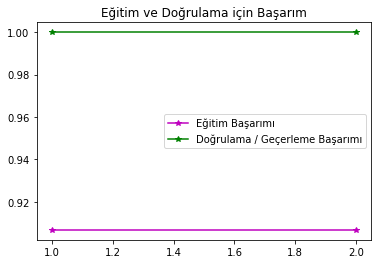

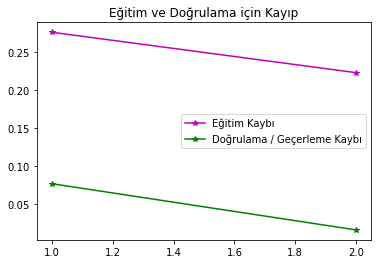

In [1164]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'm*-', label= 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label= 'Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label= 'Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt. legend()

plt.show()

In [1165]:
print(acc, 'eğitim başarımları')

[0.9067796468734741, 0.9067796468734741] eğitim başarımları


In [1166]:
y_pred = np.argmax(model.predict(seq_array),axis=1)# model.predict_classes(seq_array,verbose=1, batch_size=100) 
y_true = np.argmax(label_array,axis=1)

24/24 [==============================] - 0s 17ms/step


# Confusion matrix
# https://www.veribilimiokulu.com/hata-matrisini-confusion-matrix-yorumlama/
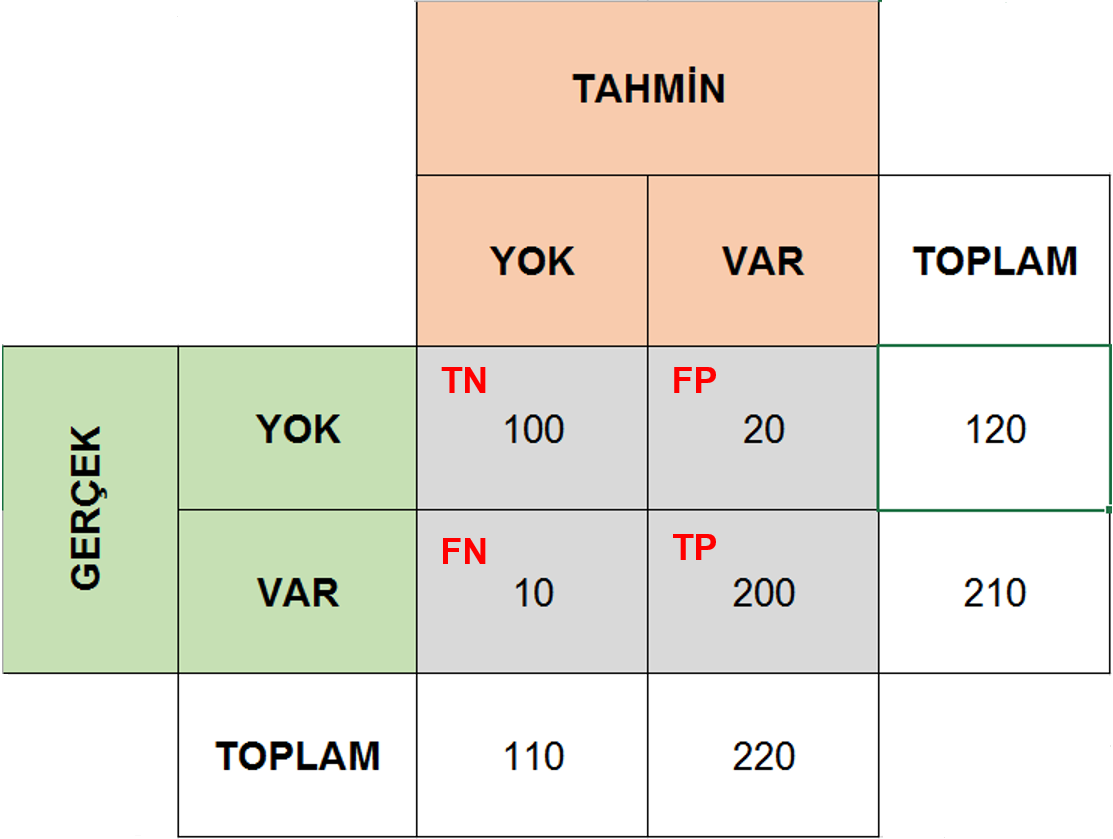


In [1167]:
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[639,  35],
       [ 11,  53]], dtype=int64)

In [1168]:
# Accuracy   = 𝐷𝑜ğ𝑟𝑢𝑙𝑢𝑘 		= (TP+TN)/(TP+TN+FP+FN) 		(19)
# Precision  = 𝐻𝑎𝑠𝑠𝑎𝑠𝑖𝑦𝑒𝑡  		= TP/( TP+FP)			(20)
# Recall     = 𝐻𝑎𝑡𝚤𝑟𝑙𝑎𝑚𝑎 		= TP/( TP+FN)			(21)
# 𝐹1−𝑠𝑘𝑜𝑟𝑢 		=2×(Hassasiyet×Hatırlama )/( Hassasiyet+Hatırlama)  	(22)


In [1169]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

precision =  0.6022727272727273 
 recall =  0.828125


In [1170]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(min_max_scaler, scaler_filename) 

['scaler.save']

In [1171]:
model.save('lstm.h5') # sadece model agirliksiz
model.save_weights('lstmWeight.h5') # sadece agiriik ve modelsiz

In [1172]:
print(seq_array[:1].shape)
print(model.predict(seq_array[:1]))
y_pred = np.argmax(model.predict(seq_array[:1]))
print(y_pred)

(1, 8, 32)
1/1 [==============================] - 0s 30ms/step
[[0.57667947 0.42332056]]
1/1 [==============================] - 0s 34ms/step
0


# TEST 
(MEVCUT SCALE WEIGHT VE MODEL ILE (HAFIZADAN ALINMADAN EGITIMDEKI DEGERLERLE)

In [1173]:
#**********************
# belli araligi alma
# w0 = '2023-02-01T00:00:00.359'
# w1 = '2023-02-08T23:59:00.359'
# testArea = data.iloc[np.where(np.logical_and(data.index < pd.to_datetime(w0), data.index<= pd.to_datetime(w1)))]

test_data = data.copy() # tumunu aldık x araligi ok y aralıgi nok diyebiliyoruz
# test_data = data.iloc[np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1))].copy() bu olsaydı belli bir araligi alacaktik ama farklı olan x ve y araligin, alamayacaktik

# hatasiz ariza yok label 1 ve degeri 1
w0_test = '2023-06-01T00:00:00.359'
w1_test = '2023-09-22T23:59:00.359'

# w0_test = '2023-09-23T07:33:00.359' #23.09.2023  07:32:19
# w1_test = '2023-10-02T05:59:59.359'

# w0_test = '2023-10-02T06:00:00.359'
# w1_test = '2023-10-02T23:59:00.359'

test_data['label1'] = np.where(np.logical_and(test_data['createdAt']>=w0_test, test_data['createdAt']<=w1_test), 1, 0)
print("OK sinyal adet ",test_data.iloc[np.where(test_data['label1'] ==1)].shape[0])

# hatali ariza var label 2 ve degeri 1

test_data['label2'] = np.where(np.logical_and(test_data['createdAt']>=w0_test, test_data['createdAt']<=w1_test), 0, 0)
print("NOK sinyal adet ",test_data.iloc[np.where(test_data['label2'] ==1)].shape[0])

test_data = test_data.iloc[:, 8:]

test_data.dropna(inplace=True)

# hatali ve arizali olan tarihler bilestirilir
test_data = test_data.iloc[np.where(np.logical_and(test_data['label1'] ==1,test_data['label2'] ==0 ))[0]]
print("TOPLAM sinyal adet ",test_data.shape)

OK sinyal adet  289
NOK sinyal adet  0
TOPLAM sinyal adet  (245, 38)


C:\Users\ayhan.ozturk\AppData\Local\Temp\ipykernel_876\3102455941.py:33: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  test_data = test_data.iloc[np.where(np.logical_and(test_data['label1'] ==1,test_data['label2'] ==0 ))[0]]


In [1174]:
datatoexcel = pd.ExcelWriter('datasetTest.xlsx')
test_data.to_excel(datatoexcel)
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [1175]:
cols_normalize_test = train_data.columns


import joblib
scaler_filename = "scaler.save"
min_max_scaler_test = joblib.load(scaler_filename) 

norm_train_df_test = pd.DataFrame(min_max_scaler_test.fit_transform(test_data[cols_normalize_test]), 
                             columns=cols_normalize_test, 
                             index=test_data.index)
join_df_test = test_data[test_data.columns.difference(cols_normalize_test)].join(norm_train_df_test)
test_df = join_df_test.reindex(columns = test_data.columns)
test_df.dropna(inplace=True)
test_df.head()

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,TEMPERATURE,CLEARANCE_1,CLEARANCE_2,CLEARANCE_3,CREST_1,CREST_2,CREST_3,GRMS_1,GRMS_2,GRMS_3,...,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data,label1,label2
"(createdAt,)",,,,,,,,,,,,,,,,,,,,,
2023-06-22 21:35:40.735,0.688577,0.091115,0.192251,0.153541,0.126905,0.136504,0.231633,0.244451,0.116538,0.063801,...,0.875346,0.618221,0.0,0.0,0.580212,0.0,0.000228,0.0,0.0,0.0
2023-06-23 07:22:25.521,0.521378,0.109901,0.356817,0.330648,0.155877,0.310197,0.632222,0.209759,0.147162,0.057688,...,0.670360,0.531453,0.0,0.0,0.518021,0.0,0.067954,0.0,0.0,0.0
2023-06-23 20:01:39.441,0.684110,0.172860,0.308329,0.191291,0.260326,0.248745,0.347829,0.270125,0.189682,0.106436,...,0.950139,0.737527,0.0,0.0,0.897527,0.0,1.000000,0.0,0.0,0.0
2023-06-23 20:31:48.159,0.666241,0.040876,0.052597,0.149317,0.070166,0.059954,0.282700,0.856536,0.708512,0.703125,...,0.764543,0.867679,0.0,0.0,0.029682,0.0,0.000398,0.0,0.0,0.0
2023-06-23 21:31:17.219,0.661136,0.057171,0.025973,0.130724,0.066797,0.015972,0.242993,0.739939,0.681247,0.404942,...,0.747922,0.590022,0.0,0.0,0.045230,0.0,0.000090,0.0,0.0,0.0


In [1176]:
test_df.shape[0]

245

In [1177]:
seq_gen_test = (list(gen_sequence(test_df, sequence_length, cols1))
                     for id in range(1,2))

seq_array_test = np.concatenate(list(seq_gen_test)).astype(np.float32)
seq_array_test.shape

(237, 8, 32)

In [1178]:
label_gen_test = [gen_labels(test_df, sequence_length, ['label1','label2']) 
             for id in range(1,2)]

label_array_test = np.concatenate(label_gen_test).astype(np.float32)

label_array_test.shape

(237, 2)

In [1179]:
y_pred_test = np.argmax(model.predict(seq_array_test),axis=1) # model.predict_classes(seq_array,verbose=1, batch_size=100) 

8/8 [==============================] - 0s 19ms/step


In [1180]:
y_true_test = np.argmax(label_array_test,axis=1)

In [1181]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1182]:
y_true_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1183]:
# initializing dict to store frequency of each element
elements_count = {}
# iterating over the elements for frequency
for element in y_pred_test:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

0: 237


# TEST -2
(MEVCUT SCALE WEIGHT VE MODEL ILE (HAFIZADAN ALINMADAN EGITIMDEKI DEGERLERLE)

In [1184]:
#**********************
# belli araligi alma
# w0 = '2023-02-01T00:00:00.359'
# w1 = '2023-02-08T23:59:00.359'
# testArea = data.iloc[np.where(np.logical_and(data.index < pd.to_datetime(w0), data.index<= pd.to_datetime(w1)))]

test_dataNOK = data.copy() # tumunu aldık x araligi ok y aralıgi nok diyebiliyoruz
# test_dataNOK = data.iloc[np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1))].copy() bu olsaydı belli bir araligi alacaktik ama farklı olan x ve y araligin, alamayacaktik

# hatasiz ariza yok label 1 ve degeri 1
# w0_testNOK = '2023-06-01T00:00:00.359'
# w1_testNOK = '2023-09-22T23:59:00.359'

w0_testNOK = '2023-09-23T07:33:00.359' #23.09.2023  07:32:19
w1_testNOK = '2023-10-02T05:59:59.359'

# w0_testNOK = '2023-10-02T06:00:00.359'
# w1_testNOK = '2023-10-02T23:59:00.359'

test_dataNOK['label1'] = np.where(np.logical_and(test_dataNOK['createdAt']>=w0_testNOK, test_dataNOK['createdAt']<=w1_testNOK), 1, 0)
print("OK sinyal adet ",test_dataNOK.iloc[np.where(test_dataNOK['label1'] ==1)].shape[0])

# hatali ariza var label 2 ve degeri 1

test_dataNOK['label2'] = np.where(np.logical_and(test_dataNOK['createdAt']>=w0_testNOK, test_dataNOK['createdAt']<=w1_testNOK), 0, 0)
print("NOK sinyal adet ",test_dataNOK.iloc[np.where(test_dataNOK['label2'] ==1)].shape[0])

test_dataNOK = test_dataNOK.iloc[:, 8:]

test_dataNOK.dropna(inplace=True)

# hatali ve arizali olan tarihler bilestirilir
test_dataNOK = test_dataNOK.iloc[np.where(np.logical_and(test_dataNOK['label1'] ==1,test_dataNOK['label2'] ==0 ))[0]]
print("TOPLAM sinyal adet ",test_dataNOK.shape)

OK sinyal adet  72
NOK sinyal adet  0
TOPLAM sinyal adet  (72, 38)


C:\Users\ayhan.ozturk\AppData\Local\Temp\ipykernel_876\3005531623.py:33: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  test_dataNOK = test_dataNOK.iloc[np.where(np.logical_and(test_dataNOK['label1'] ==1,test_dataNOK['label2'] ==0 ))[0]]


In [1185]:
datatoexcel = pd.ExcelWriter('datasetTestNOK.xlsx')
test_dataNOK.to_excel(datatoexcel)
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [1186]:
cols_normalize_test = train_data.columns


import joblib
scaler_filename = "scaler.save"
min_max_scaler_test = joblib.load(scaler_filename) 

norm_train_df_testNOK = pd.DataFrame(min_max_scaler_test.fit_transform(test_dataNOK[cols_normalize_test]), 
                             columns=cols_normalize_test, 
                             index=test_dataNOK.index)
join_df_testNOK = test_dataNOK[test_dataNOK.columns.difference(cols_normalize_test)].join(norm_train_df_testNOK)
test_dfNOK = join_df_testNOK.reindex(columns = test_dataNOK.columns)
test_dfNOK.dropna(inplace=True)
test_dfNOK.head()

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,TEMPERATURE,CLEARANCE_1,CLEARANCE_2,CLEARANCE_3,CREST_1,CREST_2,CREST_3,GRMS_1,GRMS_2,GRMS_3,...,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data,label1,label2
"(createdAt,)",,,,,,,,,,,,,,,,,,,,,
2023-09-23 07:35:15.203,0.500829,0.049331,0.114338,0.091133,0.052453,0.236897,0.146415,0.252904,0.379393,0.173449,...,0.496994,0.551339,0.0,0.0,0.086654,0.0,0.029245,0.0,0.0,0.0
2023-09-23 07:53:05.861,0.491985,0.000000,0.373181,0.023411,0.002128,0.563173,0.062884,0.004660,0.006615,0.005921,...,0.494990,0.549107,0.0,0.0,0.090135,0.0,0.002047,0.0,0.0,0.0
2023-09-23 07:53:39.218,0.489773,0.064813,0.099216,0.052410,0.104728,0.213126,0.091394,0.240382,0.385146,0.174739,...,0.488978,0.544643,0.0,0.0,0.090909,0.0,0.000676,0.0,0.0,0.0
2023-09-23 07:54:26.014,0.490326,0.128078,0.103278,0.139346,0.185481,0.168560,0.221550,0.203750,0.351991,0.152534,...,0.913828,0.558036,0.0,0.0,0.084720,0.0,0.003337,0.0,0.0,0.0
2023-09-23 08:11:22.670,0.504699,0.098306,0.129670,0.108420,0.171806,0.245507,0.196524,0.232128,0.367832,0.170253,...,0.519038,0.571429,0.0,0.0,0.088201,0.0,0.197964,0.0,0.0,0.0


In [1187]:
test_dfNOK.shape[0]

72

In [1188]:
seq_gen_testNOK = (list(gen_sequence(test_dfNOK, sequence_length, cols1))
                     for id in range(1,2))

seq_array_testNOK = np.concatenate(list(seq_gen_testNOK)).astype(np.float32)
seq_array_testNOK.shape

(64, 8, 32)

In [1189]:
label_gen_testNOK = [gen_labels(test_dfNOK, sequence_length, ['label1','label2']) 
             for id in range(1,2)]

label_array_testNOK = np.concatenate(label_gen_testNOK).astype(np.float32)

label_array_testNOK.shape

(64, 2)

In [1190]:
y_pred_testNOK = np.argmax(model.predict(seq_array_testNOK),axis=1) # model.predict_classes(seq_array,verbose=1, batch_size=100) 

2/2 [==============================] - 0s 20ms/step


In [1191]:
y_true_testNOK = np.argmax(label_array_testNOK,axis=1)

In [1192]:
y_pred_testNOK

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [1193]:
y_true_testNOK

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [1194]:
# initializing dict to store frequency of each element
elements_countNOK = {}
# iterating over the elements for frequency
for element in y_pred_testNOK:
   # checking whether it is in the dict or not
   if element in elements_countNOK:
      # incerementing the count by 1
      elements_countNOK[element] += 1
   else:
      # setting the count to 1
      elements_countNOK[element] = 1
# printing the elements frequencies
for key, value in elements_countNOK.items():
   print(f"{key}: {value}")

0: 12
1: 52
